In [12]:
from main import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Ввод данных

Тип входного уравнения (пример: explicit)

In [51]:
equation_type = str(input())

Ввод N - количество x > 0 (рекомендуется: 10-15)

In [52]:
N = int(input())

Ввод K - число t > 0 (рекомендуется: 100-500)

In [53]:
K = int(input())

Ввод T - номер шага > 0 (рекомендуется: 1)

In [54]:
T = int(input())

Вариант 7:
\begin{align}
\frac {\partial{u}} {\partial{t}} = \frac {\partial ^ 2 {u}} {\partial{x^2}} + 0.5 \cdot exp(-0.5t) \cdot cos(x), \\
U_x(0, t) = exp(-0.5t), \\
U_x(\frac {\pi} {2}, t) = -exp(-0.5t), \\
U(x, 0) = sin(x)
\end{align}

Аналитическое решение:
\begin{align}
U(x, t) = exp(-0.5t) \cdot sin(x)
\end{align}

In [55]:
params = {
    'l': np.pi,
    'psi':  lambda x: np.sin(x),
    'f':    lambda x, t: 0.5 * np.exp(-0.5 * t) * np.cos(x),
    'phi0': lambda t: np.exp(-0.5 * t),
    'phi1': lambda t: -np.exp(-0.5 * t),
    'solution': lambda x, t: np.exp(-0.5 * t) * np.sin(x),
    'bound_type': 'a1p1',
}

Входной тип аппроксимации:
1. 2 балла первой степени
2. 2 балла второй степени
3. 3 балла второй степени

In [56]:
aprox = int(input())
if (aprox == 1):
    params['bound_type'] = 'a1p1'
elif (aprox == 2):
    params['bound_type'] = 'a1p2'
else:
    params['bound_type'] = 'a1p3'

In [57]:
solver = ParabolicSolver(params, equation_type)

In [58]:
dict_ans = {
        'numerical': solver.solve(N, K, T).tolist(),
        'analytic': solver.analyticSolve(N, K, T).tolist()
    }

In [59]:
print("Сигма: ",solver.sigma)

Сигма:  1.3131225400046977


In [60]:
def draw(dict_, N, K, T, save_file="plot.png"):
    fig = plt.figure(figsize=plt.figaspect(0.3))
    # Make data
    x = np.arange(0, np.pi / 2, np.pi / 2 / N)
    t = np.arange(0, T, T / K)
    x, t = np.meshgrid(x, t)
    z1 = np.array(dict_['numerical'])
    z2 = np.array(dict_['analytic'])

    # Plot the surface.
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    plt.title('numerical')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    ax.plot_surface(x, t, z1, cmap=cm.coolwarm,
                    linewidth=0, antialiased=True)

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    plt.title('analytic')
    surf = ax.plot_surface(x, t, z2, cmap=cm.coolwarm,
                           linewidth=0, antialiased=True)
                           
    fig.colorbar(surf, shrink=0.5, aspect=15)

    plt.savefig(save_file)
    plt.show()

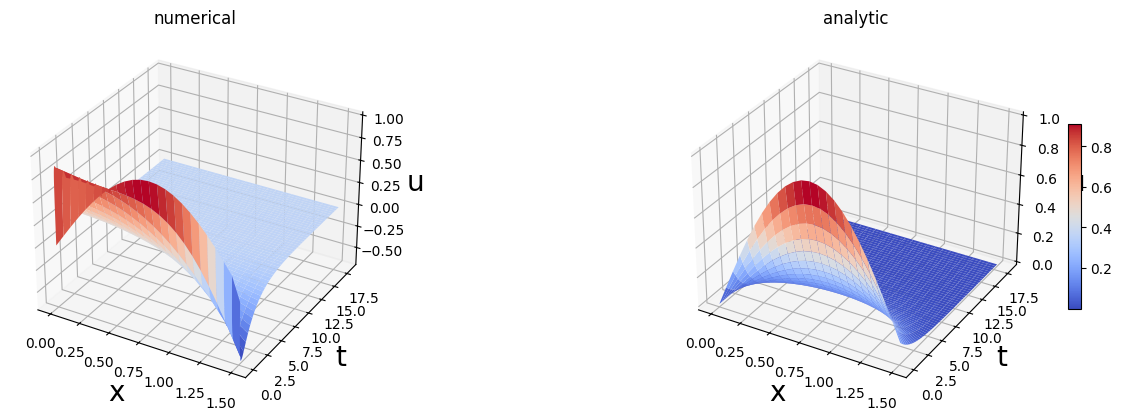

In [61]:
draw(dict_ans, N, K, T)

In [80]:
def draw_u_x(dict_, N, K, T, time=0, save_file="plot_u_x.png"):
    fig = plt.figure()
    x = np.arange(0, np.pi / 2, np.pi / 2 / N)
    t = np.arange(0, T, T / K)
    z1 = np.array(dict_['numerical'])
    z2 = np.array(dict_['analytic'])
    
#     print(z1)

    plt.title('U from x')
    plt.plot(x[0:-2], z1[time][0:-2], color='b', label='numerical')
    plt.plot(x[0:-2], z2[time][0:-2], color='g', label='analytic')
    plt.legend(loc='best')
    plt.ylabel('U')
    plt.xlabel('x')
    plt.savefig(save_file)
    plt.show()
    
    err = []
    error = compare_error(dict_ans)
    for i in range(len(error)):
        tmp = 0
        for j in error[i]:
            tmp += j
        err.append(tmp/len(error[i])/1000)
    plt.title('Error from t')
    plt.plot(t, err, color='r', label='err')
    plt.legend(loc='best')
    plt.ylabel('Err')
    plt.xlabel('t')
    plt.savefig('err.png')
    plt.show()

In [81]:
curr_time = int(input())

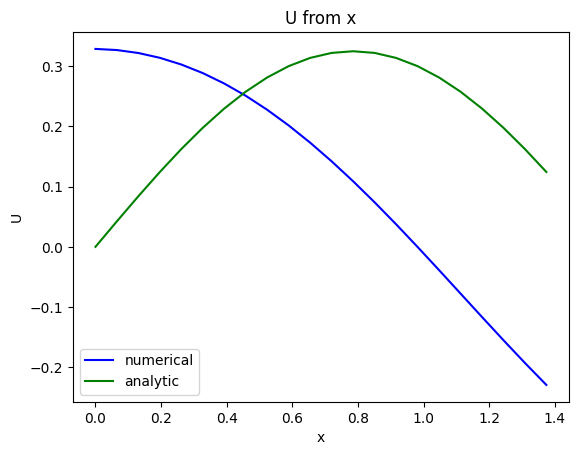

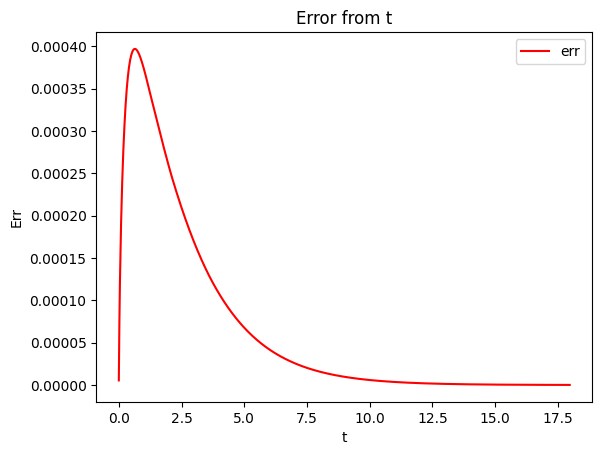

In [82]:
draw_u_x(dict_ans, N, K, T, curr_time)

In [65]:
error = compare_error(dict_ans)
avg_err = 0.0
for i in error:
    for j in i:
        avg_err += j
    avg_err /= N

Первые элементы в массиве ошибок:

In [66]:
print(error[0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.130526192220052]


Средние элементы в массиве ошибок:

In [67]:
print(error[int(K/2)])

[0.010737959425715553, 0.008728976502169784, 0.0066566269599877305, 0.004550642872582373, 0.0024406393453791624, 0.00035566280428175716, 0.0016762454739349796, 0.003628463638338187, 0.0054761748198235965, 0.007196717968601877, 0.00876989860298625, 0.010178254813339362, 0.011407274653106751, 0.012445561897259524, 0.013284948042521097, 0.013920549348063348, 0.01435076865406213, 0.01457724265254393, 0.014604736204358551, 0.014440986182256709, 0.014096498157935972, 0.013584300026421064, 0.012919657361257893, 0.01211975590705502]


Последние элементы в массиве ошибок:

In [68]:
print(error[-1])

[0.00012026927830716537, 9.733656634101687e-05, 7.370347401144272e-05, 4.970956568843637e-05, 2.569282264038482e-05, 1.9844851667452797e-06, 2.1095928479287866e-05, 4.3245347064319446e-05, 6.418154079128505e-05, 8.364711678522696e-05, 0.00010141305446520359, 0.00011728172779486916, 0.0001310893704224119, 0.00014270794942483666, 0.00015204642359449127, 0.00015905137277145358, 0.00016370699545282405, 0.00016603448261585943, 0.0001660907861939277, 0.00016396681076425611, 0.00015978506657325734, 0.0001536968308777796, 0.00014587887257058344, 0.00013652980205264683]


In [69]:
print(f'Средняя ошибка в каждом N: {avg_err}')

Средняя ошибка в каждом N: 0.0001148454191812187


In [85]:
print(f'Средняя погрешность: {avg_err / K}')

Средняя погрешность: 1.4355677397652336e-07
